In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import *

### Initialize Tagger

In [4]:
from tagger import Tagger
tagger = Tagger()

### Load Model and Data

In [7]:
model_path = '/dfs/scratch0/mccreery/repos/metal/metal/mmtl/aws/output/2019_04_04_15_29_09/2/logdir/2019_04_06/QNLI,STSB,MRPC,QQP,WNLI,RTE,MNLI,SST2,COLA_17_08_06'
task_name = 'SST2'
split = 'dev'
filepath = f'{task_name}_{split}_error_analysis.tsv'

In [8]:
# Load model and data
model, dl = load_data_and_model(model_path,task_name,split)

# Create DataFrame of Raw Data, Predictions, and Labels
print('Creating dataframe')
df_error = create_dataframe(task_name, model, dl)
print('Created dataframe')

# Save (and reload) DataFrame
csv_path = '/'.join(model_path.split('/')[0:-1])
save_dataframe(df_error, filepath)

Could not find kwarg "generate_uids" in destination dict.
Using random seed: 8552
Using soft attention head
Loading SST2 Dataset



Loading model from path: /dfs/scratch0/mccreery/repos/metal/metal/mmtl/aws/output/2019_04_04_15_29_09/2/logdir/2019_04_06/QNLI,STSB,MRPC,QQP,WNLI,RTE,MNLI,SST2,COLA_17_08_06/model.pkl


/dfs/scratch0/vschen/venv-mmtl/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'metal.mmtl.glue.glue_modules.BertRaw' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/dfs/scratch0/vschen/venv-mmtl/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'pytorch_pretrained_bert.modeling.BertIntermediate' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/dfs/scratch0/vschen/venv-mmtl/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'metal.mmtl.modules.MetalModuleWrapper' has changed. you can

Creating dataframe


872it [00:22, 39.28it/s]

Created dataframe
Saved dataframe to:  SST2_dev_error_analysis.tsv


In [9]:
df_error = load_dataframe(filepath)

In [10]:
df_error.head()

,Unnamed: 0,sentence1,sentence2,score,label,uid,pred,is_wrong
0,0,it ' s a charming and often affecting journey .,NaN,0.999971,1,SST-2/dev.tsv:2,1,False
1,1,un ##fl ##in ##ching ##ly bleak and desperate,NaN,0.000476,0,SST-2/dev.tsv:3,0,False
2,2,allows us to hope that nolan is poised to emb...,NaN,0.999974,1,SST-2/dev.tsv:4,1,False
3,3,"the acting , costumes , music , cinematograph...",NaN,0.999970,1,SST-2/dev.tsv:5,1,False
4,4,"it ' s slow - - very , very slow .",NaN,0.000113,0,SST-2/dev.tsv:6,0,False


## Sandbox for Error Analysis

**0. Some basic statistics.**

Confusion Matrix and Performance Metrics

In [13]:
df_error['label'].values

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,

In [14]:
from metal.analysis import confusion_matrix
from metal.utils import convert_labels

Y_gold = convert_labels(df_error['label'].values, "onezero", "categorical")
Y_preds = convert_labels(df_error['pred'].values, "onezero", "categorical")
Y_probs = np.vstack([df_error['score'].values, 1 - df_error['score'].values]).transpose()
confusion_matrix(Y_gold, Y_preds, pretty_print=True, normalize=True)
print()

from metal.metrics import metric_score
metric_list = ['accuracy','precision', 'recall', 'f1']

for metric in metric_list:
    score = metric_score(Y_gold, Y_preds, metric, probs=Y_probs)
    print(f"{metric.capitalize()}: {score:.3f}")

        y=1    y=2   
 l=1  *0.921  0.079  
 l=2   0.086 *0.914  

Accuracy: 0.917
Precision: 0.921
Recall: 0.917
F1: 0.919


Plotting Predictions and Predicted Probabilistic Label Distribution

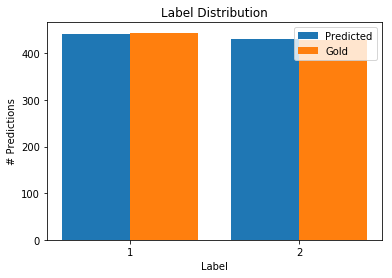

Plotting probabilities from the first column of Y_probs


/dfs/scratch0/mccreery/repos/metal/metal/contrib/visualization/analysis.py:147: RuntimeWarning: invalid value encountered in long_scalars
  bin_accuracy = sum(bin_idxs * correct_idxs) / sum(bin_idxs)


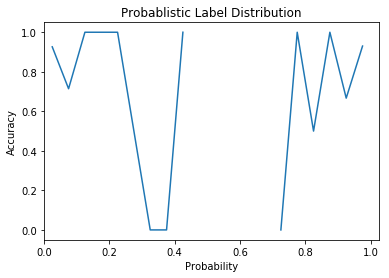

In [15]:
from metal.contrib.visualization.analysis import (
        plot_predictions_histogram, 
        plot_probabilities_histogram,
        plot_calibration_plot
    )
plot_predictions_histogram(Y_preds, Y_gold, title="Label Distribution")
plot_calibration_plot(Y_probs, Y_gold, title="Probablistic Label Distribution")

**1. We want to look at examples that are "barely" wrong and "barely" right since we have hope for boosts here.**

In [16]:
print("\033[1mBARELY WRONG\033[0;0m")
print_barely_wrong(df_error, thresh=0.2, n=3)

print()

print("\033[1mBARELY RIGHT\033[0;0m")
print_barely_right(df_error, thresh=0.2, n=3)

BARELY WRONG
6 matches were found with the given criteria.

sentence1: 	 if steven so ##der ##berg ##h ' s ` solar ##is ' is a failure it is a glorious failure . 
sentence2: 	nan
score: 	0.3387
label: 	1

sentence1: 	 the script kicks in , and mr . hartley ' s di ##sten ##ded pace and foot - dragging rhythms follow . 
sentence2: 	nan
score: 	0.6056
label: 	0

sentence1: 	 what better message than ` love thy ##sel ##f ' could young women of any size receive ? 
sentence2: 	nan
score: 	0.3871
label: 	1


BARELY RIGHT
5 matches were found with the given criteria.

sentence1: 	 davis . . . is so en ##amo ##red of her own creation that she ca n ' t see how ins ##uf ##fera ##ble the character is . 
sentence2: 	nan
score: 	0.4281
label: 	0

sentence1: 	 it moves quickly , ad ##roi ##tly , and without fuss ; it does n ' t give you time to reflect on the ina ##nity - - and the cold war dated ##ness - - of its premise . 
sentence2: 	nan
score: 	0.5313
label: 	1

sentence1: 	 the primitive force o

**2. We also want to look at examples we got completely wrong since that could point to a systematic bias in the data/model. It could also help us find examples in the dataset that are mislabeled by human annotators**

In [17]:
print("\033[1mVERY WRONG\033[0;0m")
print_very_wrong(df_error, thresh=0.9, n=10)

# print("\033[1mVERY RIGHT\033[0;0m")
# print_very_right(df_error, thresh=0.9, n=)

VERY WRONG
63 matches were found with the given criteria.

sentence1: 	 good film , but very g ##lum . 
sentence2: 	nan
score: 	0.0008
label: 	1

sentence1: 	 intriguing documentary which is emotionally dil ##uted by focusing on the story ' s least interesting subject . 
sentence2: 	nan
score: 	0.0232
label: 	1

sentence1: 	 every nano ##se ##con ##d of the the new guy reminds you that you could be doing something else far more pleas ##urable . 
sentence2: 	nan
score: 	0.9995
label: 	0

sentence1: 	 outer - space buff ##s might love this film , but others will find its pleasures intermittent . 
sentence2: 	nan
score: 	0.9999
label: 	0

sentence1: 	 every dance becomes about seduction , where backs ##ta ##bbing and betrayal ##s are celebrated , and sex is currency . 
sentence2: 	nan
score: 	0.9517
label: 	0

sentence1: 	 the ja ##bs it employs are short , carefully placed and dead - center . 
sentence2: 	nan
score: 	0.0014
label: 	1

sentence1: 	 a working class ` ` us vs . them ' ' ope

**3. To find systematic errors, we can also look for correlations between certain features and the incorrectness a la Socratic**


We can make this way more sophisticated by perhaps using embeddings instead of this simple [BoW featurization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer).

In [18]:
print("\033[1mSYSTEMATIC EXAMPLES\033[0;0m")
for i in range(3):
    print_systematic_wrong(df_error)

SYSTEMATIC EXAMPLES


/dfs/scratch0/vschen/venv-mmtl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


sam mendes
horror movie
working class
hearts tri
original ity

9 matches were found with the given criteria.

sentence1: 	 though it ' s become almost redundant to say so , major ku ##dos go to leigh for actually casting people who look working - class . 
sentence2: 	nan
score: 	0.0297
label: 	1

sam mendes
horror movie
working class
tri ng
original ity

9 matches were found with the given criteria.

sentence1: 	 a working class ` ` us vs . them ' ' opera that leaves no hearts ##tri ##ng un ##tu ##gged and no liberal cause un ##pl ##under ##ed . 
sentence2: 	nan
score: 	0.0083
label: 	1

sam mendes
horror movie
working class
original ity
hearts tri

9 matches were found with the given criteria.

sentence1: 	 sam mendes has become vale ##dict ##oria ##n at the school for soft landings and easy ways out . 
sentence2: 	nan
score: 	0.9999
label: 	0



## Designing Labeling Functions

**1. Number Based LF**

Our model tends to fail when there are numbers involved in the two sentences. We can look for the same number being repeated in both sentences as an LF

In [11]:
def LF_number(idx):
    sentence1_nums = [int(s) for s in df_error['sentence1'][idx].split() if s.isdigit()]
    sentence2_nums = [int(s) for s in df_error['sentence2'][idx].split() if s.isdigit()]
    common_nums = len(set(sentence1_nums).intersection(set(sentence2_nums)))
    
    if (sentence1_nums == []) or (sentence2_nums == []):
        return 0
    
    if common_nums > 0:
        return 2
    else:
        return 1

In [12]:
print_row(df_error.iloc[70])
print("LF_label: ", LF_number(70)-1)

print()
print()
print_row(df_error.iloc[254])
print("LF_label: ", LF_number(254)-1)

sentence1: 	 about 33 . 5 million people live in this massive con ##ur ##bation . i would guess that 95 % of the 5 , 000 officially foreign - capital firms in japan are based in tokyo . 
sentence2: 	 about 33 . 5 mi ##ili ##on people live in tokyo . 
score: 	0.0056
label: 	1

LF_label:  1


sentence1: 	 monica meadows , a 22 - year - old model from atlanta , was shot in the shoulder on a subway car in new york city . 
sentence2: 	 monica meadows , 23 , was shot in shoulder while riding a subway car in new york city 
score: 	0.9879
label: 	0

LF_label:  0


**2. Edit Distance Based LF**

Our model tends to vote entailment when one sentence is long and the other is short. We can focus on this slice and flip the labelt o vote no entailment even when the number of words is the same.

In [13]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

from collections import Counter
def common_words(s1,s2):
    s1_set = set(Counter(s1.split()))
    s2_set = set(Counter(s2.split()))
    return len(s1_set.intersection(s2_set))/float(min(len(s1_set),len(s2_set)))

In [14]:
def LF_words(idx):
    ratio = common_words(df_error['sentence1'][idx], df_error['sentence2'][idx])
    if ratio < 0.3:
        return 1
    if (ratio <= 1.0) and (ratio > 0.4):
        return 2
    else:
        return 0

In [15]:
print_row(df_error.iloc[150])
print("LF_label: ", LF_words(150)-1)

print()
print()
print_row(df_error.iloc[95])
print("LF_label: ", LF_words(95)-1)

sentence1: 	 quebec woman and her mother accused of plotting to kill a four - year - old girl . 
sentence2: 	 quebec woman murdered a four - year - old girl . 
score: 	0.0143
label: 	0

LF_label:  1


sentence1: 	 i asked myself how to understand the ' twilight ' s success . and i have come to the idea that when you really believe in something , sooner or later it will become real . so , i guess this is what happened with robert patti ##nson . last year he was just an unknown actor who ' s biggest role was in a pair of " harry potter " movies . now , not only that twilight is competing with ' harry potter ' , but robert patti ##nson is one of the most famous young actors who sucked $ 37 ##3 . 4 million from global box offices . so the movie about a vampire boy who falls in love with a normal girl , begun a real hysteria . and patti ##nson has a lot to do with it ! . 
sentence2: 	 robert patti ##nson is a vampire . 
score: 	0.9955
label: 	0

LF_label:  1


### Analyze Labeling Functions

In [16]:
L = np.zeros((np.shape(df_error)[0],2))
for i in range(df_error.shape[0]):
    L[i,0] = LF_number(i)
    L[i,1] = LF_words(i)

Labeling Function Summary

In [17]:
from metal.analysis import lf_summary
from scipy.sparse import csr_matrix    

L_sparse = csr_matrix(L)
lf_summary(L_sparse,Y=df_error.label+1)

,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
0,"[1.0, 2.0]",0.158845,0.155235,0.025271,22,22,0.500000
1,"[1.0, 2.0]",0.949458,0.155235,0.025271,148,115,0.562738


In [18]:
incorrect = set(np.where(df_error.is_wrong == True)[0])
LF1_set = set(np.where(L[:,0]-1. == df_error.label)[0])
LF2_set = set(np.where(L[:,1]-1. == df_error.label)[0])

print("Percentage Corrected by LF_num: ", 100.*len(LF1_set.intersection(incorrect))/float(len(incorrect)))
print("Percentage Corrected by LF_words: ", 100.*len(LF2_set.intersection(incorrect))/float(len(incorrect)))

Percentage Corrected by LF_num:  6.8493150684931505
Percentage Corrected by LF_words:  31.506849315068493


## Using Model for Task A to Predict on Train Set for Task B

We start with QNLI and RTE since those are both about `entailment` and `not_entailment`

In [19]:
# model config (needs to be the same as parameters used for training)
bert_model = "bert-base-uncased"
max_len = 256
bert_output_dim = 768
max_datapoints = -1
dl_kwargs = {"batch_size": 32, "shuffle": False}

In [20]:
# 02/19/19
model_paths = {
    'MNLI_SAN': '/dfs/scratch1/senwu/mmtl/logs/checkpoints/17-2-2019/MNLI_SAN_02_27_41/',
    'QNLI': '/dfs/scratch0/mccreery/mmtl/logs/2019_02_19/QNLI_09_56_46/',
    'STSB': '/dfs/scratch0/mccreery/mmtl/logs/2019_02_19/STSB_09_46_46/',
    'SST2': '/dfs/scratch0/mccreery/mmtl/logs/2019_02_19/SST2_06_01_35/',
    'COLA': '/dfs/scratch0/mccreery/mmtl/logs/2019_02_19/COLA_05_49_39/',
    'RTE':'/dfs/scratch0/mccreery/mmtl/logs/2019_02_19/RTE_06_32_37/',
    'WNLI': '/dfs/scratch0/mccreery/mmtl/logs/2019_02_19/WNLI_06_38_32/',
    'QQP': '/dfs/scratch0/mccreery/mmtl/logs/2019_02_19/QQP_06_47_48/',
    'MRPC':'/dfs/scratch0/mccreery/mmtl/logs/2019_02_19/MRPC_09_40_25/'
}

In [21]:
# source_task_name = 'QNLI'
# target_task_name = 'RTE'

# #create source task
# source_task = create_tasks(
#     task_names=[source_task_name],
#     bert_model=bert_model,
#     max_len=max_len,
#     dl_kwargs=dl_kwargs,
#     splits=['test'],
#     max_datapoints=max_datapoints,
# )[0]

# # load source model weights 
# source_model_path = os.path.join(model_paths[source_task_name], 'best_model.pth')
# source_model = MetalModel([source_task], verbose=False, device=0)
# source_model.load_weights(source_model_path)
# source_model.eval()
    
    
# #create target task
# target_task = create_tasks(
#     task_names=[target_task_name],
#     bert_model=bert_model,
#     max_len=max_len,
#     dl_kwargs=dl_kwargs,
#     splits=['train'],
#     max_datapoints=max_datapoints,
# )[0]

# # predict on target task train set
# target_task.name = source_task_name #HACK FOR LINE 225 in METAL_MODEL.PY
# Y, Y_probs, Y_preds = source_model._predict_probs(
#     target_task, split='train', return_preds=True)

# # true labels for target task train set
# Y_true = []
# for x, y in tqdm(list(target_task.data_loaders['train'])):
#     Y_true += list(y.numpy())

In [22]:
# confident_idx = list(np.where(np.abs(Y_probs[:,0]-0.5) >= 0.4)[0])
# Y_true = np.array(Y_true)
# print (f'Accuracy of {source_task_name} model on {target_task_name}: {np.mean(Y_preds[confident_idx] == Y_true[confident_idx])}')